In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Load the data
data = pd.read_csv('./data/cleaned_hate_crime_forecasting.csv')

In [87]:
data

,incident_date,region_name,offender_race,state_name,bias_desc,grouped_total_offender_count,grouped_victim_count,generalized_offense_name,generalized_location_name
0,1991-01-01,Midwest,White,Minnesota,['Anti-Black or African American'],Few,Few,violent crimes,Residence
1,1991-01-01,Northeast,White,Pennsylvania,['Anti-Black or African American'],Few,Few,violent crimes,Miscellaneous
2,1991-01-01,Northeast,White,New York,['Anti-White'],Few,Few,violent crimes,Miscellaneous
3,1991-01-01,South,Black or African American,Maryland,['Anti-White'],Several,Few,violent crimes,Public Place
4,1991-01-01,Northeast,Black or African American,New York,['Anti-White'],Few,Few,violent crimes,Miscellaneous
...,...,...,...,...,...,...,...,...,...
134434,2022-12-31,South,Black or African American,Texas,['Anti-Gay Male'],Few,Few,violent crimes,Residence
134435,2022-12-31,West,Black or African American,California,['Anti-Gay Male'],Few,Few,violent crimes,Law Enforcement
134436,2022-12-31,West,White,Colorado,['Anti-Black or African American'],Few,Few,violent crimes,Public Place
134437,2022-12-31,Northeast,White,New Jersey,['Anti-Black or African American'],Few,Few,violent crimes,Residence


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134439 entries, 0 to 134438
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   incident_date                 134439 non-null  object
 1   region_name                   134439 non-null  object
 2   offender_race                 134439 non-null  object
 3   state_name                    134439 non-null  object
 4   bias_desc                     134439 non-null  object
 5   grouped_total_offender_count  134439 non-null  object
 6   grouped_victim_count          134439 non-null  object
 7   generalized_offense_name      134439 non-null  object
 8   generalized_location_name     134439 non-null  object
dtypes: object(9)
memory usage: 9.2+ MB


In [89]:
# Convert the incident_date to datetime
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [90]:
# add a new column for year
data['year'] = data['incident_date'].dt.year

In [91]:
data

,incident_date,region_name,offender_race,state_name,bias_desc,grouped_total_offender_count,grouped_victim_count,generalized_offense_name,generalized_location_name,year
0,1991-01-01,Midwest,White,Minnesota,['Anti-Black or African American'],Few,Few,violent crimes,Residence,1991
1,1991-01-01,Northeast,White,Pennsylvania,['Anti-Black or African American'],Few,Few,violent crimes,Miscellaneous,1991
2,1991-01-01,Northeast,White,New York,['Anti-White'],Few,Few,violent crimes,Miscellaneous,1991
3,1991-01-01,South,Black or African American,Maryland,['Anti-White'],Several,Few,violent crimes,Public Place,1991
4,1991-01-01,Northeast,Black or African American,New York,['Anti-White'],Few,Few,violent crimes,Miscellaneous,1991
...,...,...,...,...,...,...,...,...,...,...
134434,2022-12-31,South,Black or African American,Texas,['Anti-Gay Male'],Few,Few,violent crimes,Residence,2022
134435,2022-12-31,West,Black or African American,California,['Anti-Gay Male'],Few,Few,violent crimes,Law Enforcement,2022
134436,2022-12-31,West,White,Colorado,['Anti-Black or African American'],Few,Few,violent crimes,Public Place,2022
134437,2022-12-31,Northeast,White,New Jersey,['Anti-Black or African American'],Few,Few,violent crimes,Residence,2022


In [92]:
# read in the population data
population = pd.read_csv('./data/population_cleaned.csv')
population

,Description,1970,1980,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,3444354,3894025,4451497,4463343,4471462,4489876,4510588,4542912,4594911,...,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
1,Alaska,302583,401851,627748,633538,641974,647671,659305,667114,675322,...,722349,730810,737626,737075,738430,742575,740983,736624,733603,731158
2,Arizona,1775399,2716546,5166304,5303869,5451472,5590820,5758692,5973970,6190987,...,6473416,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7421401
3,Arkansas,1923322,2286358,2678115,2690743,2704471,2722804,2746215,2776257,2814910,...,2941038,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3030522
4,California,19971071,23667764,33994383,34481753,34867773,35236589,35538256,35770688,35947461,...,37636311,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39368078
5,Colorado,2209596,2889735,4328277,4432779,4502883,4545766,4595674,4655731,4747872,...,5121900,5193660,5270774,5352637,5454328,5543844,5617421,5697155,5758486,5807719
6,Connecticut,3032217,3107564,3411506,3428043,3448145,3468319,3474379,3477185,3484531,...,3588632,3595211,3595792,3595697,3588561,3579830,3575324,3574561,3566022,3557006
7,Delaware,548104,594338,786417,794954,804636,815525,827154,840296,853301,...,907590,915518,924062,933131,942065,949989,957942,966985,976668,986809
8,Florida,6791418,9746959,16046148,16350988,16675166,16974177,17366358,17773291,18076361,...,19055607,19302016,19551678,19853880,20219111,20627237,20977089,21254926,21492056,21733312
9,Georgia,4587930,5462989,8230306,8418687,8582756,8727810,8907292,9090479,9323575,...,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017


In [93]:
# make year a column and change "Description" to "state_name"
population = population.melt(id_vars='Description', var_name='year', value_name='population')
population = population.rename(columns={'Description': 'state_name'})
population['year'] = population['year'].astype(int)
population

,state_name,year,population
0,Alabama,1970,3444354
1,Alaska,1970,302583
2,Arizona,1970,1775399
3,Arkansas,1970,1923322
4,California,1970,19971071
...,...,...,...
1145,Virginia,2020,8590563
1146,Washington,2020,7693612
1147,West Virginia,2020,1784787
1148,Wisconsin,2020,5832655


# Time Series Analysis

## Number of Hate Crimes by Bias

### Number of Hate Crimes by Bias for all biases

In [94]:
import ast

data['bias_desc'] = data['bias_desc'].apply(ast.literal_eval)

In [95]:
# Number of Hate Crimes by Bias
df_bias = data['bias_desc'].explode()
df_bias = df_bias.value_counts().reset_index()
df_bias =  df_bias.rename(columns={'bias_desc': 'Bias', 'count': 'Number of incidents'})
df_bias

,Bias,Number of incidents
0,Anti-Black or African American,48634
1,Anti-White,19834
2,Anti-Gay Male,16374
3,Anti-Hispanic or Latino,11232
4,Anti-Other Race/Ethnicity/Ancestry,6222
5,Anti-Jewish,6074
6,Anti-Asian,4533
7,Anti-Lesbian,4526
8,Gay,4526
9,Bisexual,4526


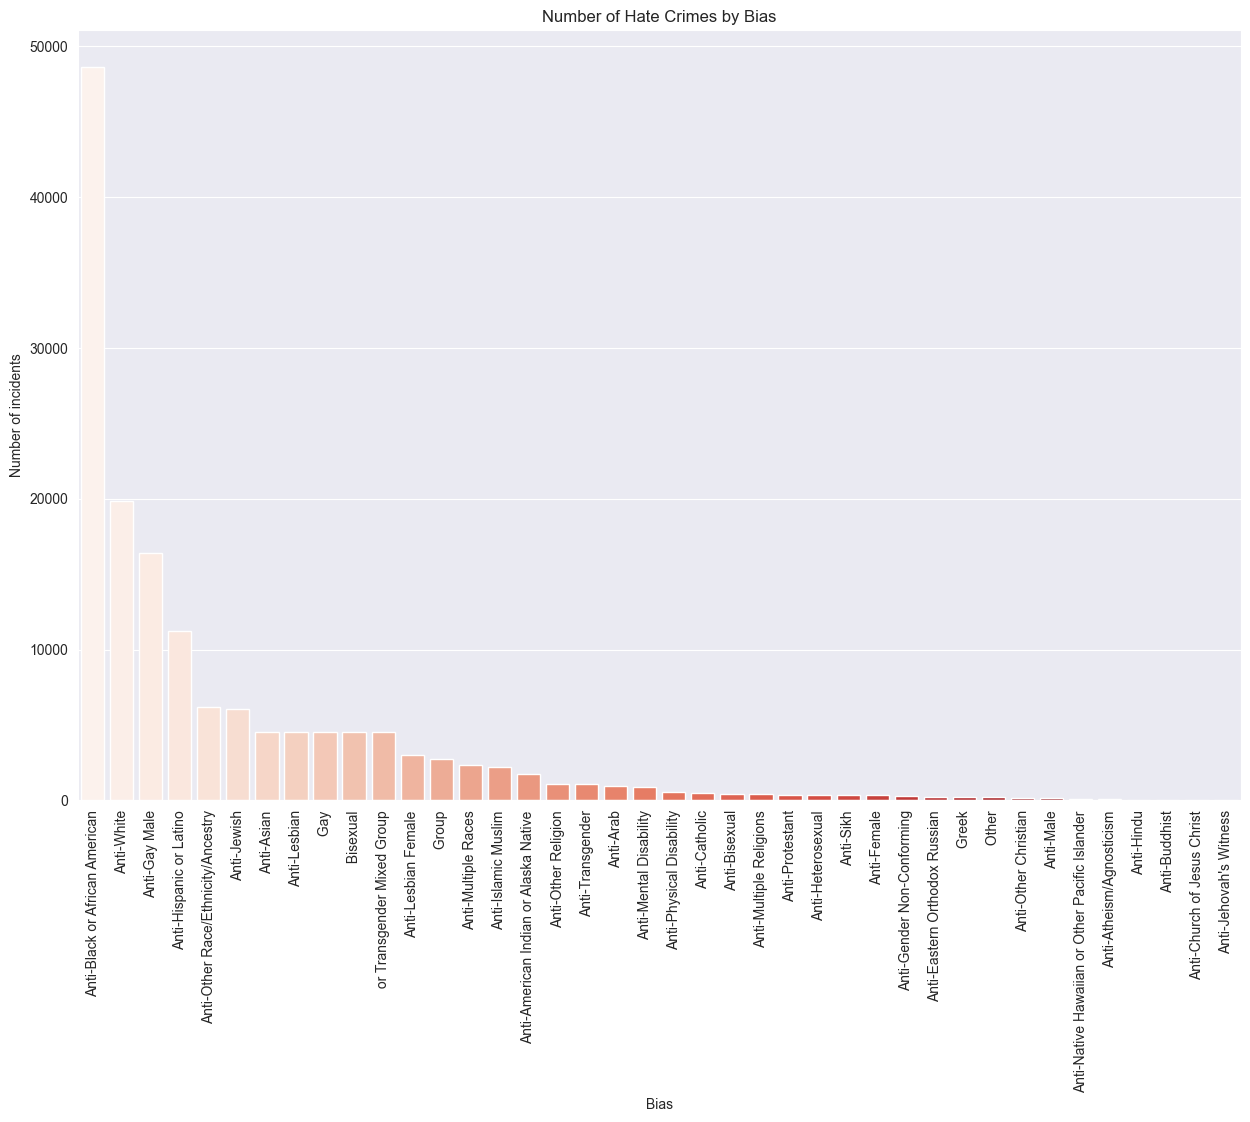

In [96]:
# plot the number of incidents by bias
plt.figure(figsize=(15, 10))
sns.barplot(data=df_bias, x='Bias', y='Number of incidents', palette='Reds', hue='Bias')
plt.xticks(rotation=90)
plt.title('Number of Hate Crimes by Bias')
plt.show()

In [97]:
# plot summary statistics
df_bias.describe()

,Number of incidents
count,40.000000
mean,3801.400000
std,8456.106638
min,27.000000
25%,246.000000
50%,742.000000
75%,4526.000000
max,48634.000000


### Number of Hate Crimes by Bias for the top 10 biases

In [98]:
# find the top 10 biases with the highest number of incidents
top_10_biases = df_bias.head(10)
top_10_biases


,Bias,Number of incidents
0,Anti-Black or African American,48634
1,Anti-White,19834
2,Anti-Gay Male,16374
3,Anti-Hispanic or Latino,11232
4,Anti-Other Race/Ethnicity/Ancestry,6222
5,Anti-Jewish,6074
6,Anti-Asian,4533
7,Anti-Lesbian,4526
8,Gay,4526
9,Bisexual,4526


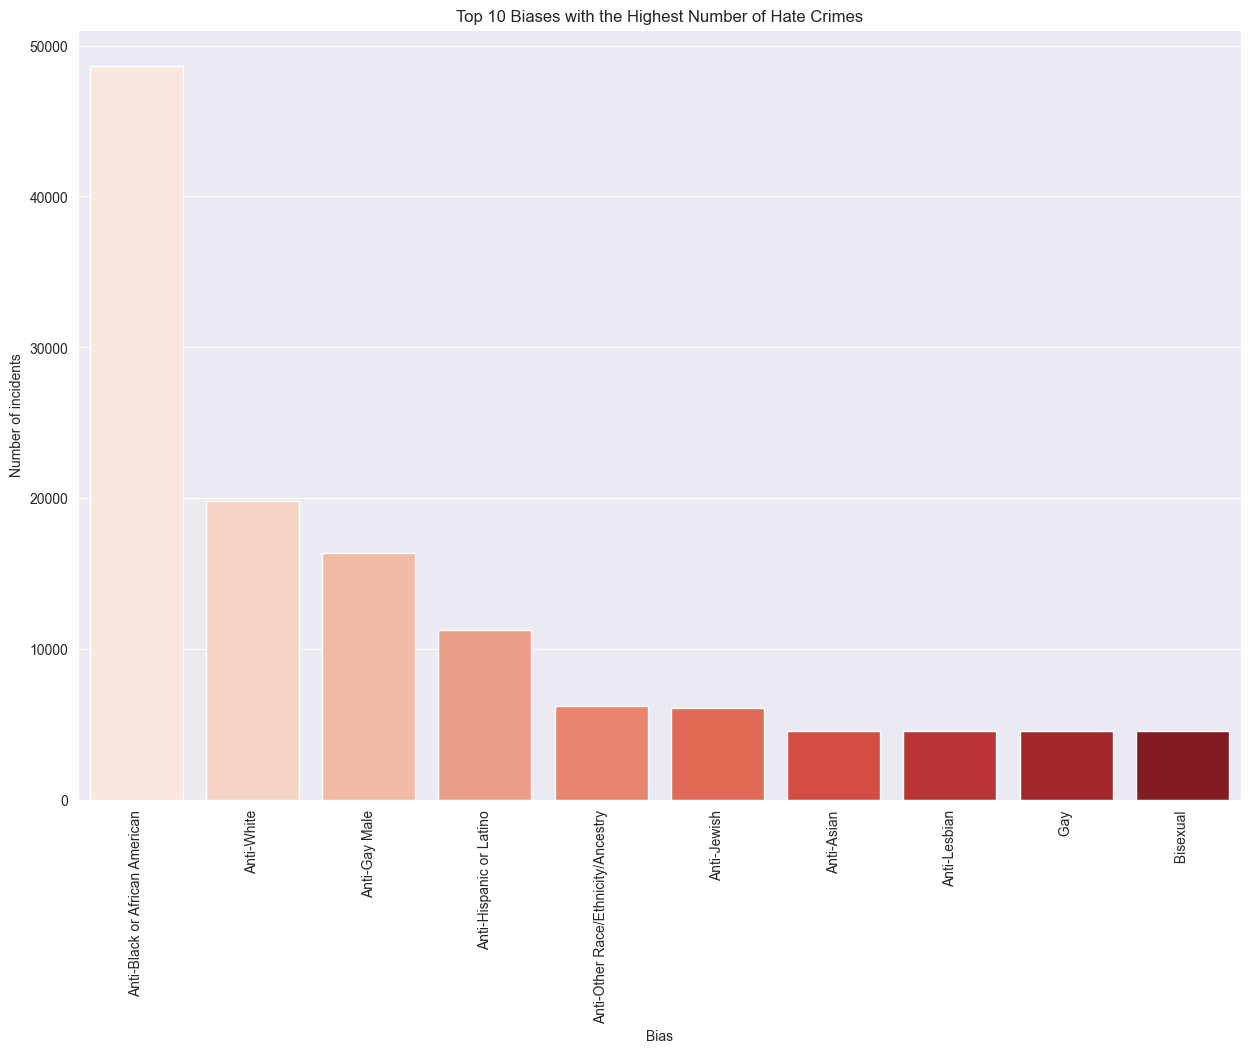

In [99]:
# plot the top 10 biases with the highest number of incidents
plt.figure(figsize=(15, 10))
sns.barplot(data=top_10_biases, x='Bias', y='Number of incidents', palette='Reds', hue='Bias')
plt.xticks(rotation=90)
plt.title('Top 10 Biases with the Highest Number of Hate Crimes')
plt.show()

In [100]:
# find the number of incidents by bias per year for the top 10 biases
df_bias_year = data.explode('bias_desc')
df_bias_year = df_bias_year[df_bias_year['bias_desc'].isin(top_10_biases['Bias'])]
df_bias_year = df_bias_year.groupby(['bias_desc', 'year']).size().reset_index(name='Number of incidents')
df_bias_year


,bias_desc,year,Number of incidents
0,Bisexual,1991,16
1,Bisexual,1992,35
2,Bisexual,1993,36
3,Bisexual,1994,31
4,Bisexual,1995,44
...,...,...,...
315,Anti-White,2018,571
316,Anti-White,2019,501
317,Anti-White,2020,706
318,Anti-White,2021,798


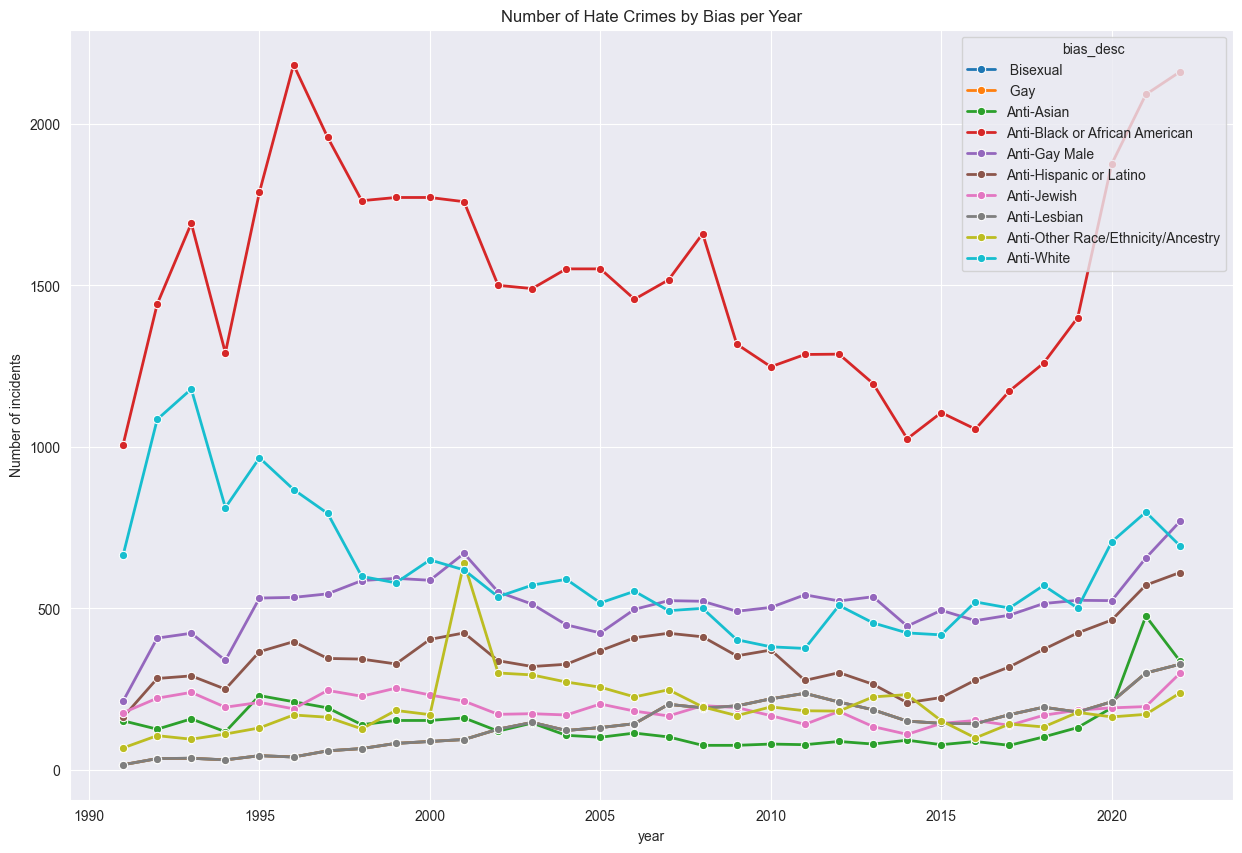

In [101]:
# plot the number of incidents by bias per year for the top 10 biases
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_bias_year, x='year', y='Number of incidents', hue='bias_desc', linewidth=2, marker='o')
plt.title('Number of Hate Crimes by Bias per Year')
plt.show()

### Rolling Average of Hate Crimes by Bias for the top 10 biases

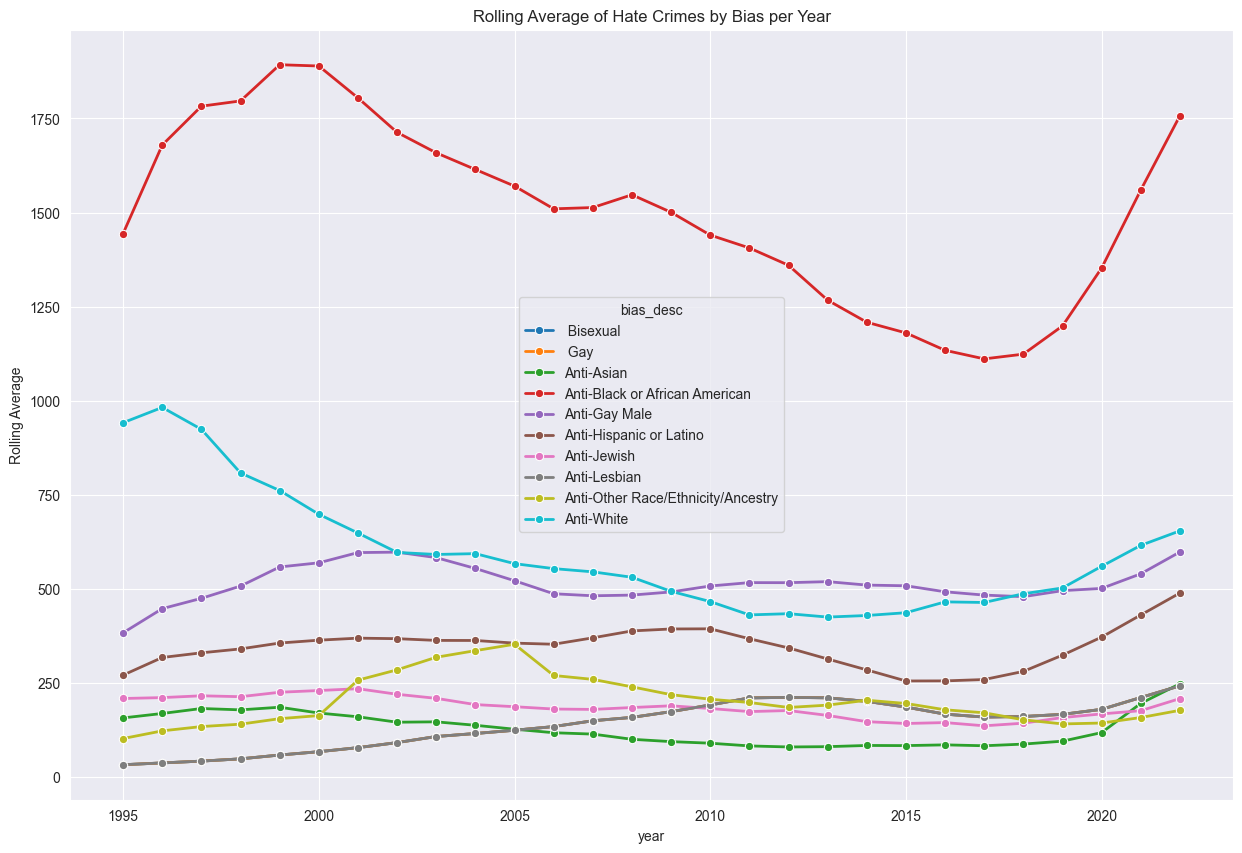

In [102]:
# plot the rolling average of hate crimes by bias for the top 10 biases
plt.figure(figsize=(15, 10))
df_bias_year['Rolling Average'] = df_bias_year.groupby('bias_desc')['Number of incidents'].transform(lambda x: x.rolling(5).mean())
sns.lineplot(data=df_bias_year, x='year', y='Rolling Average', hue='bias_desc', linewidth=2, marker='o')
plt.title('Rolling Average of Hate Crimes by Bias per Year')
plt.show()

### The first order difference of the number of hate crimes by bias for the top 10 biases

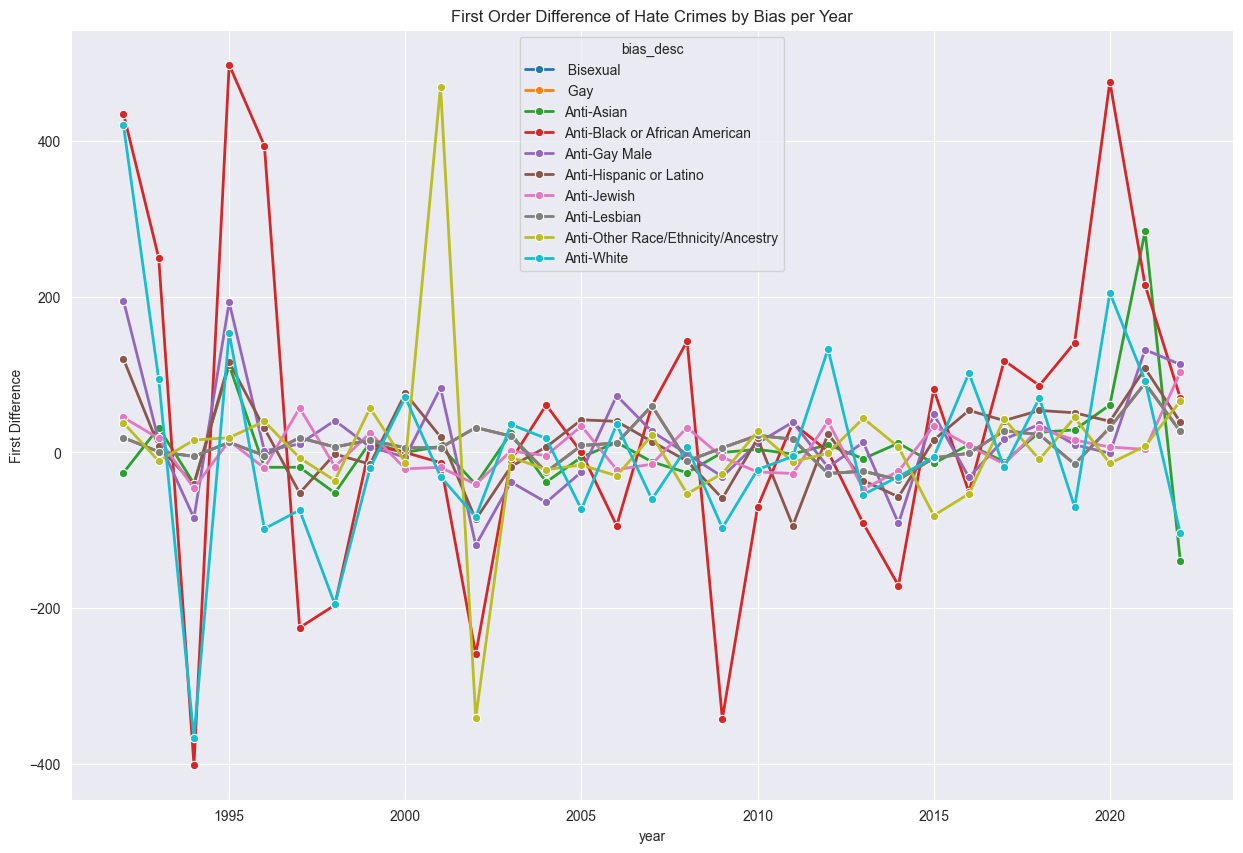

In [103]:
# plot the first order difference of hate crimes by bias for the top 10 biases
plt.figure(figsize=(15, 10))
df_bias_year['First Difference'] = df_bias_year.groupby('bias_desc')['Number of incidents'].transform(lambda x: x.diff())
sns.lineplot(data=df_bias_year, x='year', y='First Difference', hue='bias_desc', linewidth=2, marker='o')
plt.title('First Order Difference of Hate Crimes by Bias per Year')
plt.show()

## Number of Hate Crimes by State

### Number of Hate Crimes by State for all states

In [104]:
# Number of Hate Crimes by State
df_state = data.groupby('state_name').size().reset_index(name='Number of incidents')
df_state

,state_name,Number of incidents
0,Alabama,491
1,Alaska,181
2,Arizona,4441
3,Arkansas,795
4,California,23508
5,Colorado,3284
6,Connecticut,1936
7,Delaware,421
8,District of Columbia,1362
9,Federal,83


### Number of Hate Crimes by State for the top 10 states

In [105]:
# find the number of incidents by state per year for the top 10 states
df_state_year = data.groupby(['state_name', 'year']).size().reset_index(name='Number of incidents')
df_state_year 

,state_name,year,Number of incidents
0,Alabama,1992,2
1,Alabama,1993,5
2,Alabama,2002,2
3,Alabama,2004,2
4,Alabama,2007,3
...,...,...,...
1528,Wyoming,2017,2
1529,Wyoming,2019,3
1530,Wyoming,2020,12
1531,Wyoming,2021,13


In [106]:
# combine the population data by year and state and only include years between 2000 and 2020
df_state_year = pd.merge(df_state_year, population, on=['state_name', 'year'])
df_state_year = df_state_year[(df_state_year['year'] >= 2000) & (df_state_year['year'] <= 2020)]
df_state_year

,state_name,year,Number of incidents,population
0,Alabama,2002,2,4471462
1,Alabama,2004,2,4510588
2,Alabama,2007,3,4634063
3,Alabama,2008,6,4673889
4,Alabama,2009,5,4707496
...,...,...,...,...
1011,Wyoming,2015,2,586389
1012,Wyoming,2016,3,585243
1013,Wyoming,2017,2,579994
1014,Wyoming,2019,3,580116


In [107]:
# add a column that calculates the number of incidents per 100,000 people
df_state_year['Number of incidents per 100,000 people'] = df_state_year['Number of incidents'] / df_state_year['population'] * 100000
df_state_year

,state_name,year,Number of incidents,population,"Number of incidents per 100,000 people"
0,Alabama,2002,2,4471462,0.044728
1,Alabama,2004,2,4510588,0.044340
2,Alabama,2007,3,4634063,0.064738
3,Alabama,2008,6,4673889,0.128373
4,Alabama,2009,5,4707496,0.106214
...,...,...,...,...,...
1011,Wyoming,2015,2,586389,0.341071
1012,Wyoming,2016,3,585243,0.512608
1013,Wyoming,2017,2,579994,0.344831
1014,Wyoming,2019,3,580116,0.517138


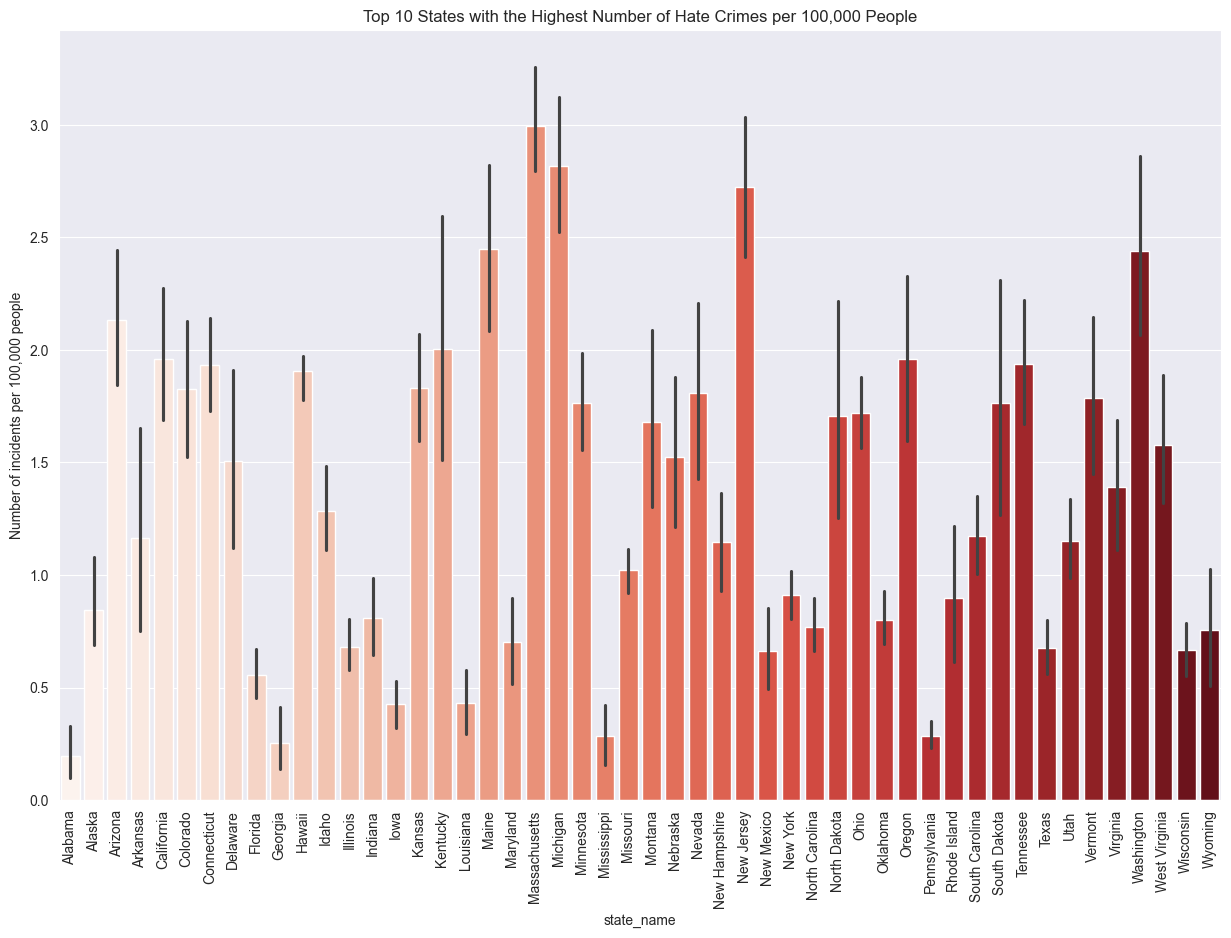

In [108]:
# plot the states with the number of incidents per 100,000 people
plt.figure(figsize=(15, 10))
sns.barplot(data=df_state_year, x='state_name', y='Number of incidents per 100,000 people', palette='Reds', hue='state_name')
plt.xticks(rotation=90)
plt.title('Top 10 States with the Highest Number of Hate Crimes per 100,000 People')
plt.show()

In [109]:
# find the top 10 states with the highest number of incidents per 100,000 people
top_10_states = df_state_year.groupby('state_name')['Number of incidents per 100,000 people'].mean().sort_values(ascending=False).head(10)
top_10_states

state_name
Massachusetts    2.993252
Michigan         2.817184
New Jersey       2.724780
Maine            2.449725
Washington       2.439007
Arizona          2.131446
Kentucky         2.003506
California       1.960983
Oregon           1.958352
Tennessee        1.935494
Name: Number of incidents per 100,000 people, dtype: float64

/var/folders/j0/w3lmv8z16kb8rl50cyl2dbjc0000gn/T/ipykernel_5589/546743056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='Reds')


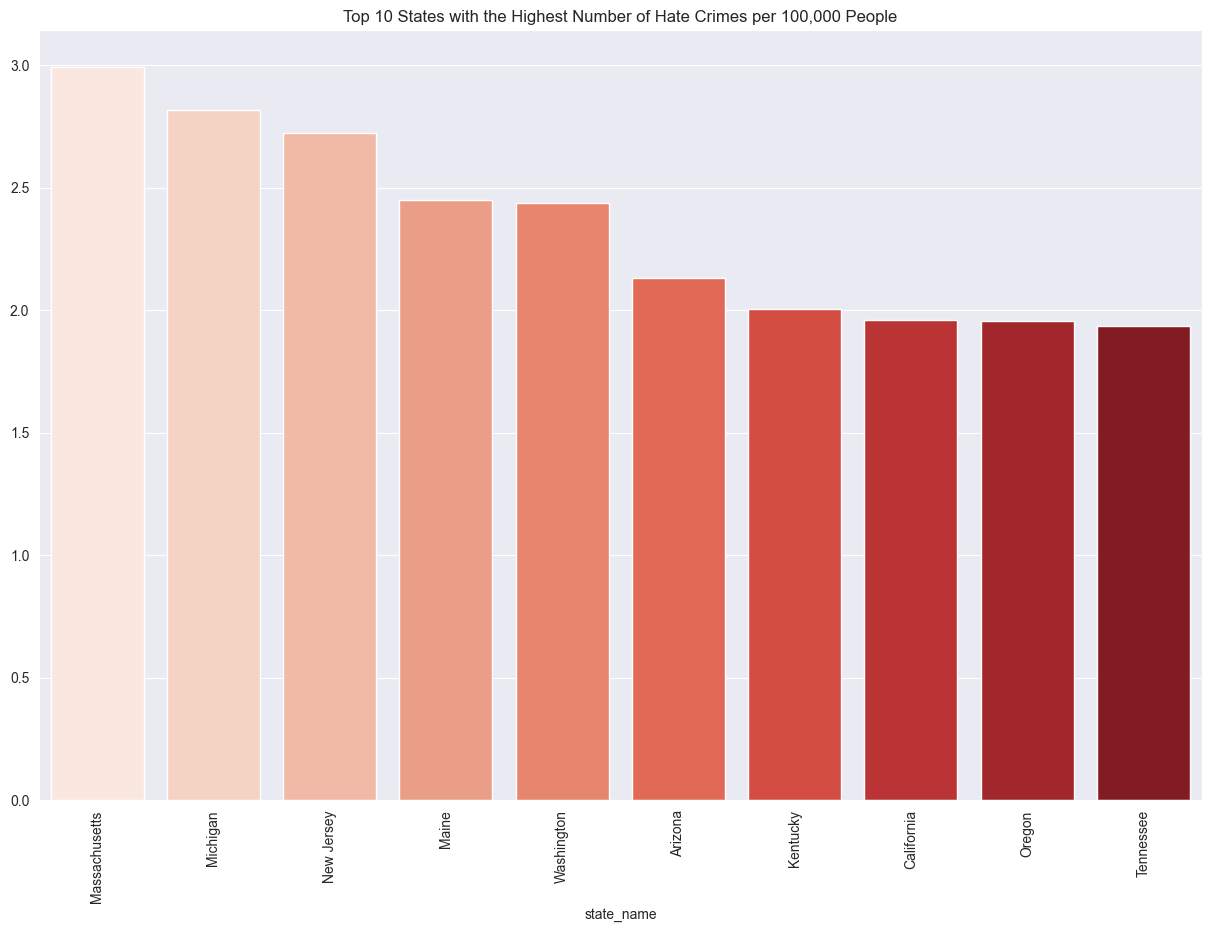

In [110]:
# plot the top 10 states with the highest number of incidents per 100,000 people
plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='Reds')
plt.xticks(rotation=90)
plt.title('Top 10 States with the Highest Number of Hate Crimes per 100,000 People')
plt.show()

In [111]:
# filter the data to only include the top 10 states with the highest number of incidents per 100,000 people for each year
df_state_year = df_state_year[df_state_year['state_name'].isin(top_10_states.index)]
df_state_year

,state_name,year,Number of incidents,population,"Number of incidents per 100,000 people"
37,Arizona,2000,170,5166304,3.290554
38,Arizona,2001,227,5303869,4.279895
39,Arizona,2002,155,5451472,2.843269
40,Arizona,2003,125,5590820,2.235808
41,Arizona,2004,121,5758692,2.101172
...,...,...,...,...,...
952,Washington,2016,235,7299961,3.219195
953,Washington,2017,309,7427951,4.159963
954,Washington,2018,363,7526793,4.822771
955,Washington,2019,300,7614024,3.940098


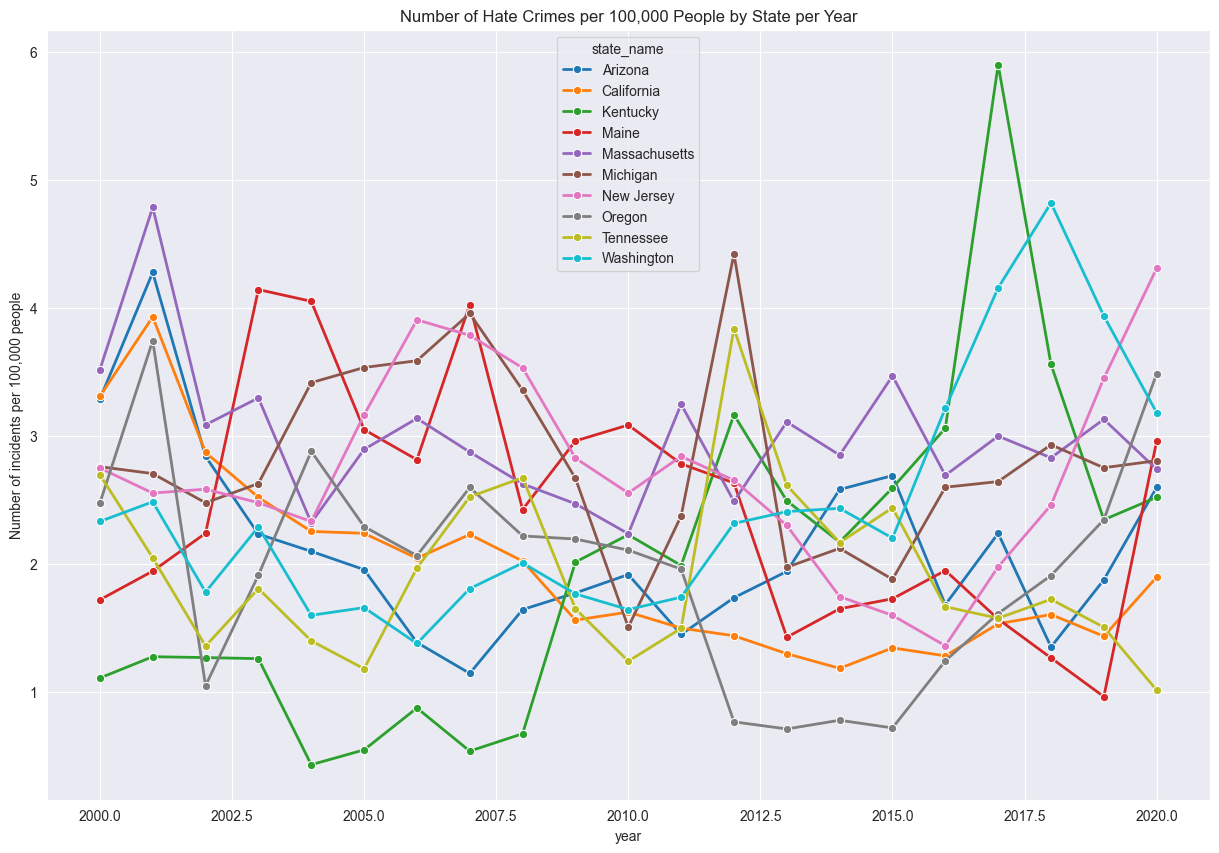

In [112]:
# plot the number of incidents per 100,000 people by state for the top 10 states for each year
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_state_year, x='year', y='Number of incidents per 100,000 people', hue='state_name', linewidth=2, marker='o')
plt.title('Number of Hate Crimes per 100,000 People by State per Year')
plt.show()

### Rolling Average of Hate Crimes by State for the top 10 states

/var/folders/j0/w3lmv8z16kb8rl50cyl2dbjc0000gn/T/ipykernel_5589/642215091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_year['Rolling Average'] = df_state_year.groupby('state_name')['Number of incidents per 100,000 people'].transform(lambda x: x.rolling(5).mean())


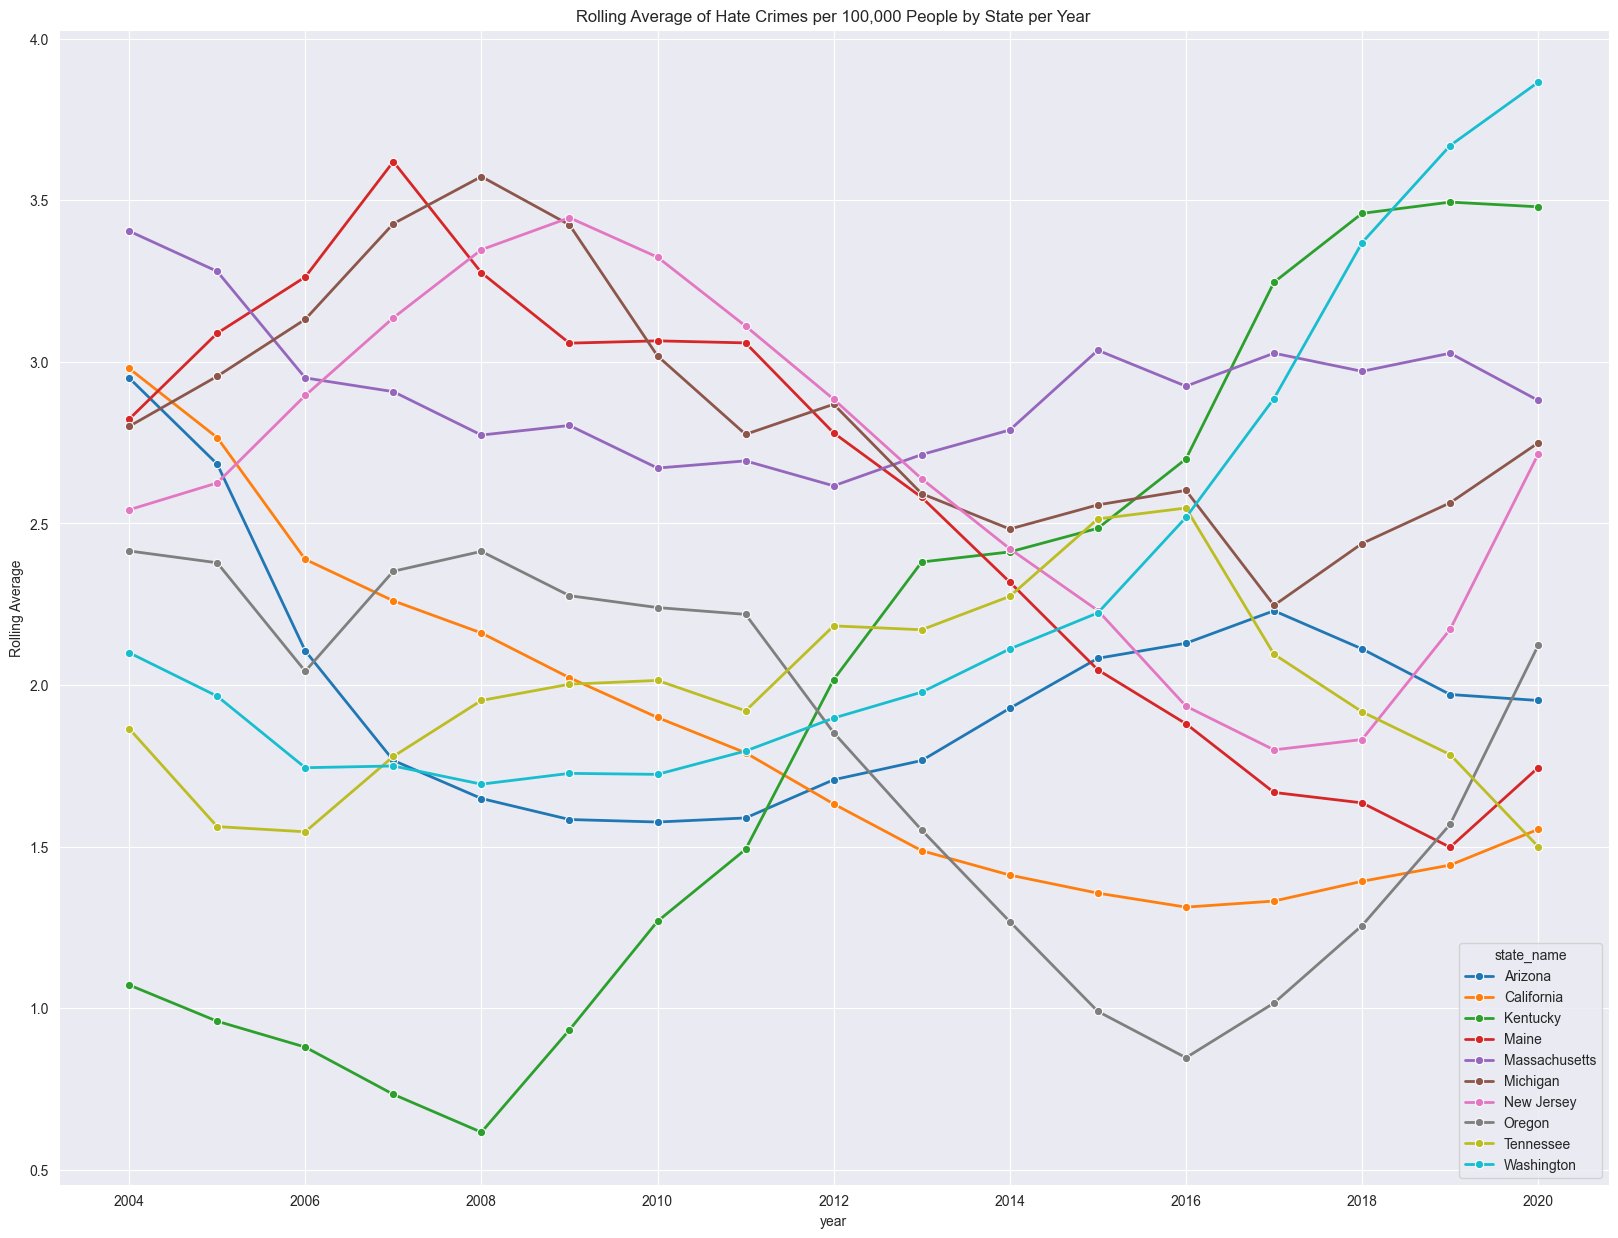

In [113]:
# plot the rolling average of hate crimes per 100,000 people by state for the top 10 states for each year
plt.figure(figsize=(20, 15))
df_state_year['Rolling Average'] = df_state_year.groupby('state_name')['Number of incidents per 100,000 people'].transform(lambda x: x.rolling(5).mean())
sns.lineplot(data=df_state_year, x='year', y='Rolling Average', hue='state_name', linewidth=2, marker='o')
plt.title('Rolling Average of Hate Crimes per 100,000 People by State per Year')
plt.show()


### The first order difference of the number of hate crimes by state for the top 10 states

/var/folders/j0/w3lmv8z16kb8rl50cyl2dbjc0000gn/T/ipykernel_5589/304439808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_year['First Difference'] = df_state_year.groupby('state_name')['Number of incidents per 100,000 people'].transform(lambda x: x.diff())


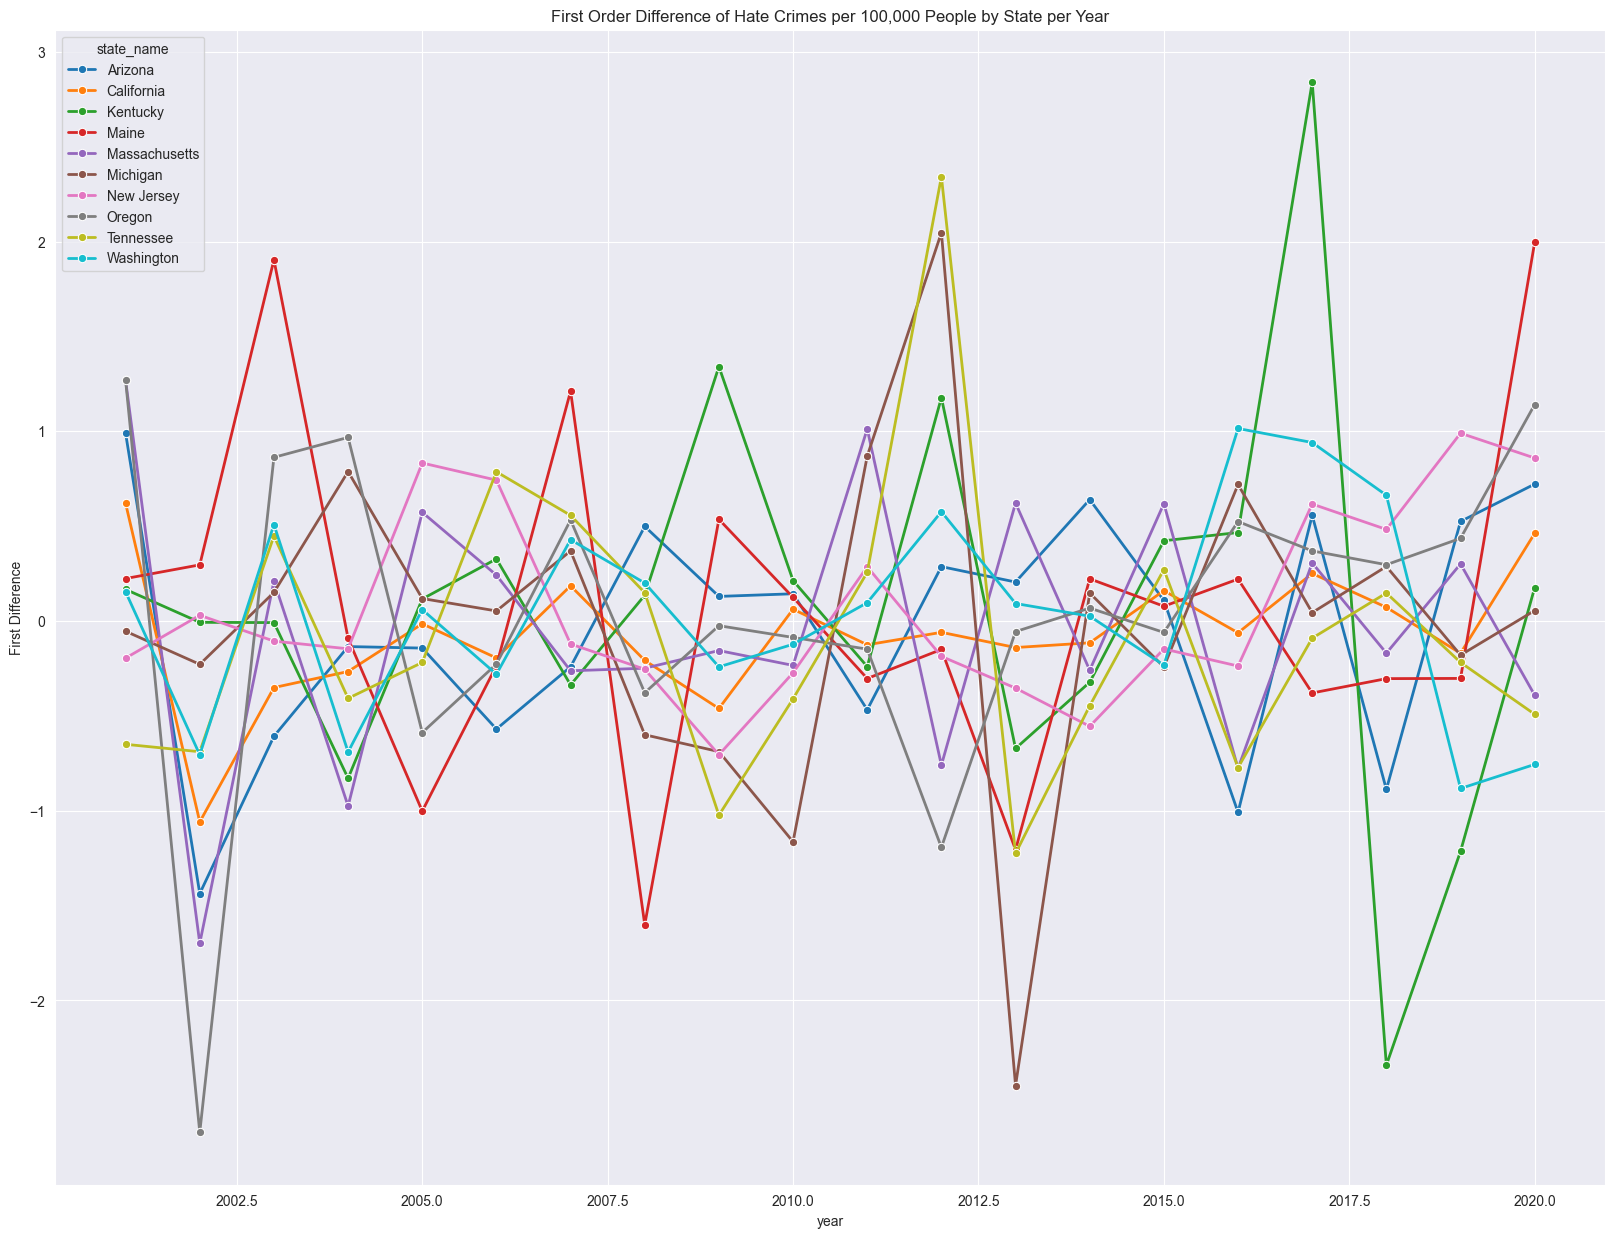

In [114]:
# plot the first order difference of hate crimes per 100,000 people by state for the top 10 states for each year
plt.figure(figsize=(20, 15))
df_state_year['First Difference'] = df_state_year.groupby('state_name')['Number of incidents per 100,000 people'].transform(lambda x: x.diff())
sns.lineplot(data=df_state_year, x='year', y='First Difference', hue='state_name', linewidth=2, marker='o')
plt.title('First Order Difference of Hate Crimes per 100,000 People by State per Year')
plt.show()

In [115]:
# plot summary statistics
df_state_year.describe()

,year,Number of incidents,population,"Number of incidents per 100,000 people",Rolling Average,First Difference
count,210.00000,210.000000,2.100000e+02,210.000000,170.000000,200.000000
mean,2010.00000,205.480952,9.144875e+06,2.341373,2.283243,0.007780
std,6.06977,204.779803,9.674417e+06,0.902175,0.694171,0.733325
min,2000.00000,13.000000,1.277040e+06,0.434177,0.615787,-2.694395
25%,2005.00000,86.250000,4.354052e+06,1.663421,1.769531,-0.302665
50%,2010.00000,149.000000,6.544353e+06,2.298857,2.234893,-0.011479
75%,2015.00000,235.750000,8.773019e+06,2.840273,2.802305,0.369394
max,2020.00000,1356.000000,3.943761e+07,5.902698,3.865297,2.839846



## Number of Hate Crimes by Year

In [116]:
# create a new dataframe with the number of incidents by year
data_year = data.groupby('year').size().reset_index(name='Number of incidents')
data_year

,year,Number of incidents
0,1991,2600
1,1992,3939
2,1993,4358
3,1994,3368
4,1995,4572
5,1996,4917
6,1997,4683
7,1998,4251
8,1999,4288
9,2000,4492


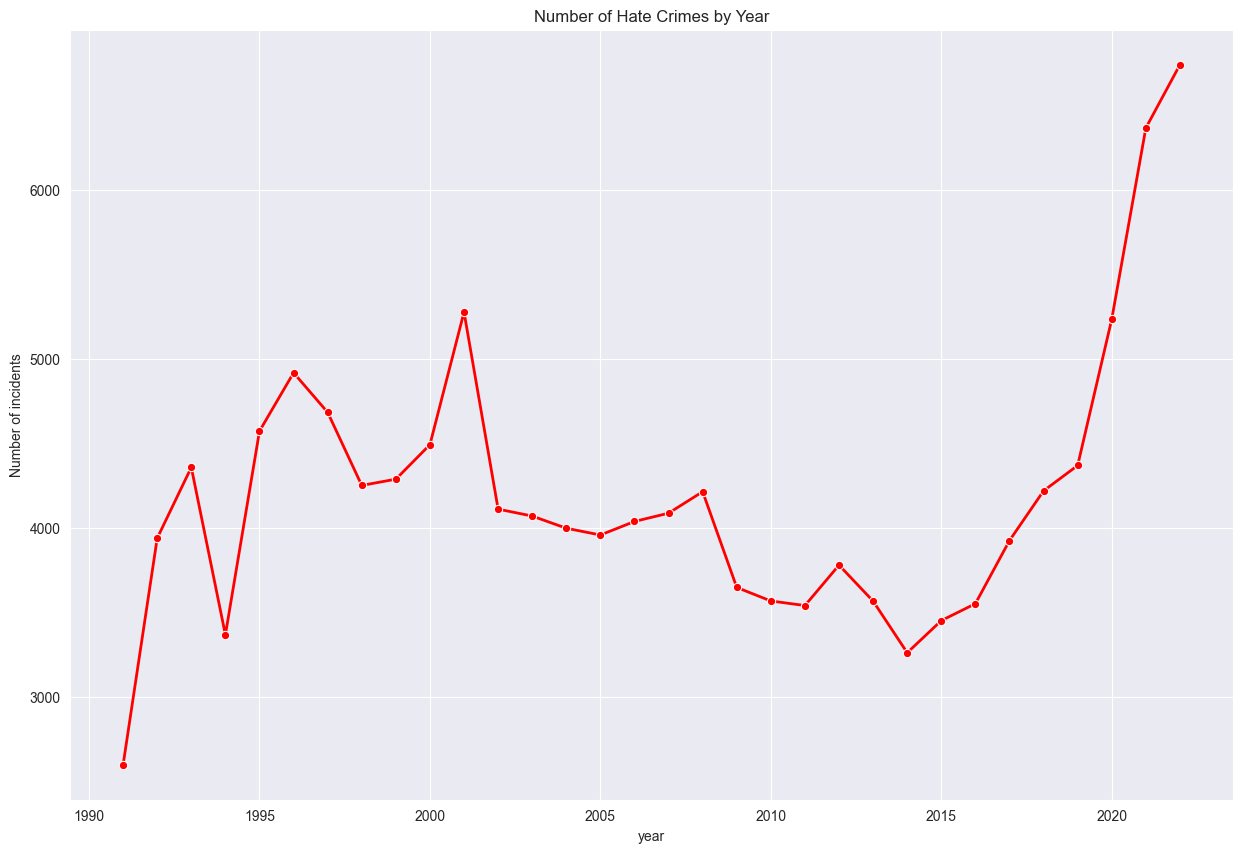

In [117]:
# plot the number of incidents by year
plt.figure(figsize=(15, 10))
sns.lineplot(data=data_year, x='year', y='Number of incidents', linewidth=2, marker='o', color='red')
plt.title('Number of Hate Crimes by Year')
plt.show()

### Rolling Average of Hate Crimes by Year

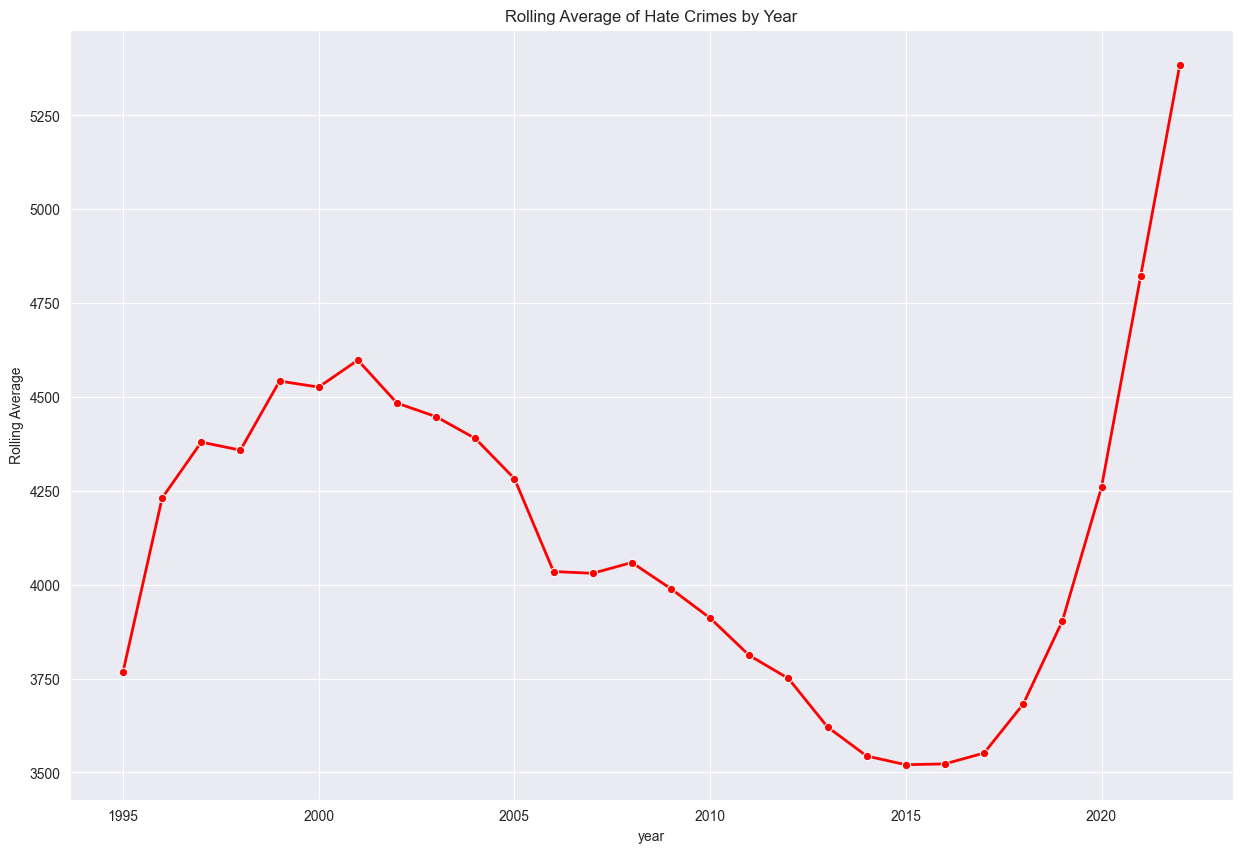

In [118]:
# Plot the rolling average of hate crimes by year
plt.figure(figsize=(15, 10))
data_year['Rolling Average'] = data_year['Number of incidents'].rolling(5).mean()
sns.lineplot(data=data_year, x='year', y='Rolling Average', linewidth=2, marker='o', color='red')
plt.title('Rolling Average of Hate Crimes by Year')
plt.show()

### The first order difference of the number of hate crimes by year

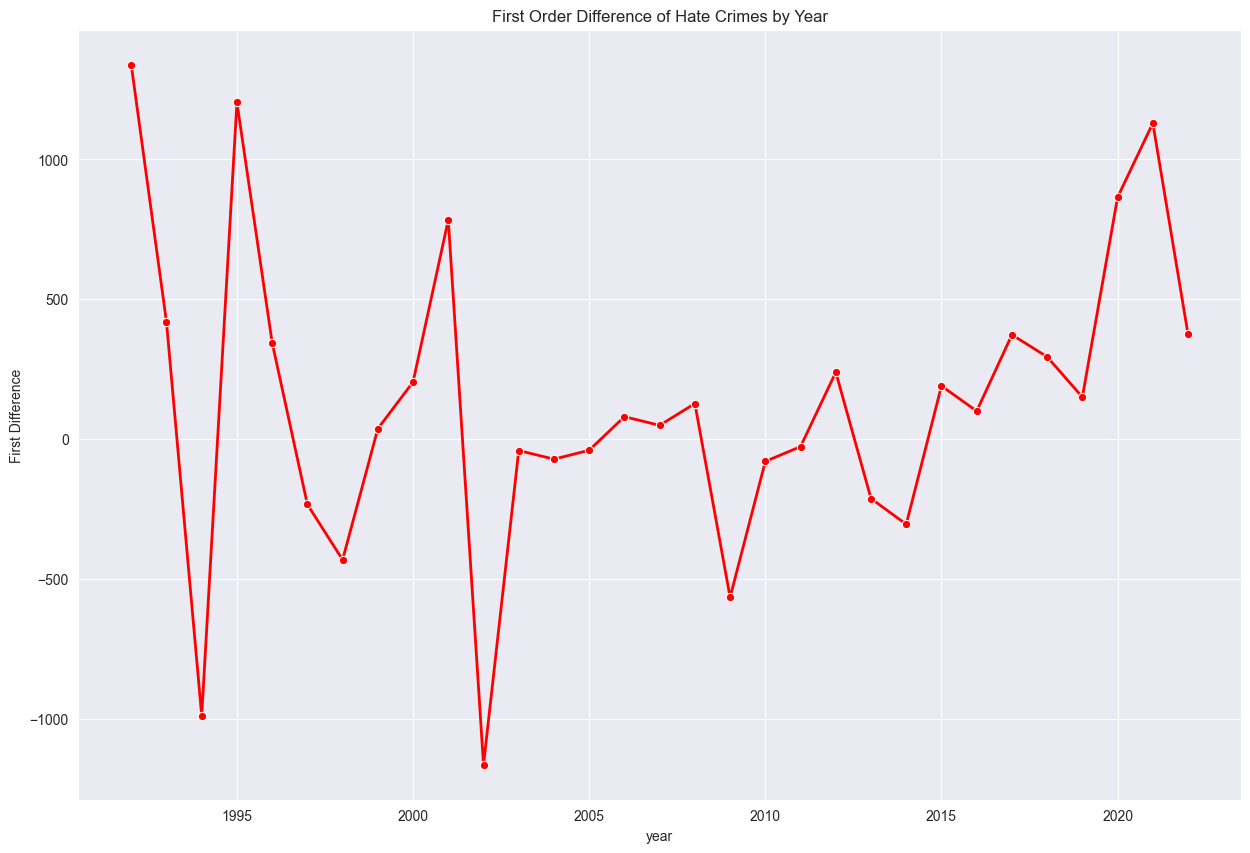

In [119]:
# Plot the first order difference of the number of hate crimes by year
plt.figure(figsize=(15, 10))
data_year['First Difference'] = data_year['Number of incidents'].diff()
sns.lineplot(data=data_year, x='year', y='First Difference', linewidth=2, marker='o', color='red')
plt.title('First Order Difference of Hate Crimes by Year')
plt.show()

### Bar plot of the number of hate crimes by year

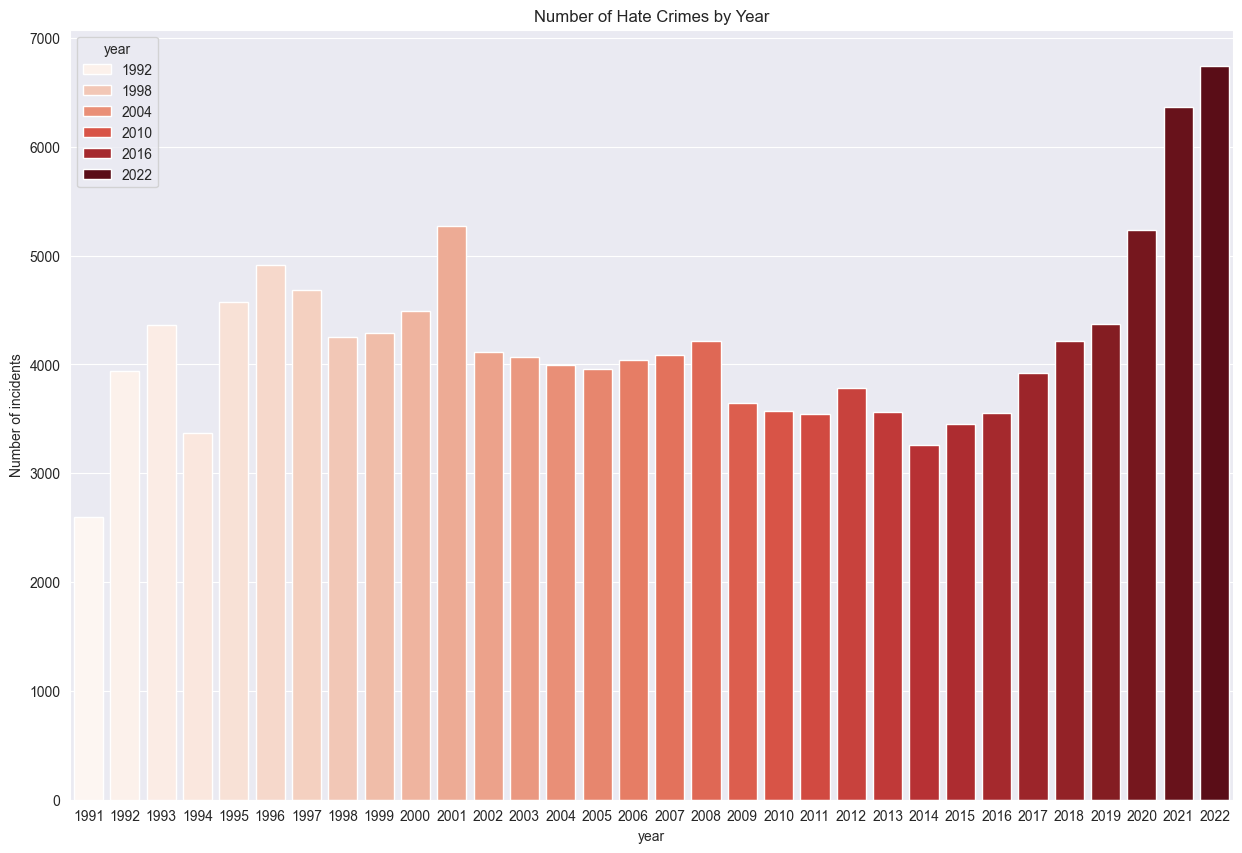

In [120]:
# Plot the number of hate crimes by year
plt.figure(figsize=(15, 10))
sns.barplot(data=data_year, x='year', y='Number of incidents', palette='Reds', hue='year')
plt.title('Number of Hate Crimes by Year')
plt.show()

In [121]:
# plot summary statistics
data_year.describe()

,year,Number of incidents,Rolling Average,First Difference
count,32.000000,32.000000,28.000000,31.000000
mean,2006.500000,4201.218750,4121.521429,133.483871
std,9.380832,833.194387,449.467228,554.877576
min,1991.000000,2600.000000,3520.400000,-1165.000000
25%,1998.750000,3628.000000,3763.100000,-76.000000
50%,2006.500000,4078.500000,4047.000000,100.000000
75%,2014.250000,4399.750000,4403.900000,359.000000
max,2022.000000,6738.000000,5384.800000,1339.000000


### Forecasting the Number of Hate Crimes by Year

In [122]:
from sklearn.metrics import mean_squared_error
from math import sqrt

aalpha = 0.8

def find_best_alpha(train, test):
    max_alpha = 1
    alpha = 0.01
    best_alpha = 0
    best_rms = 100000000
    best_y_hat_avg = test.copy()
    y_hat_avg = test.copy()
    while alpha <= max_alpha:
        pred = []
        ft = pd.DataFrame.ewm(train, span = 10).mean()['Number of incidents'].iloc[-1]
        pred.append(ft)
        for i in range(1,len(test['Number of incidents'])):
            dt = test['Number of incidents'].iloc[i]
            ft_plus_1 = alpha*dt + (1-alpha)*ft
            pred.append(ft_plus_1)
            ft = ft_plus_1
        y_hat_avg['SES'] = pd.Series(pred).values
        rms = sqrt(mean_squared_error(test['Number of incidents'], y_hat_avg.SES))
        if rms < best_rms:
            best_rms = rms
            best_alpha = alpha
            best_y_hat_avg = y_hat_avg.copy()
        alpha += 0.01
    return best_alpha, best_y_hat_avg, best_rms

In [123]:
def get_forecast(train, test):
    y_hat_avg = test.copy()
    pred = []
    ft = pd.DataFrame.ewm(train, span = 10).mean()['Number of incidents'].iloc[-1]
    pred.append(ft)
    for i in range(1,len(test['Number of incidents'])):
        dt = test['Number of incidents'].iloc[i]
        ft_plus_1 = aalpha*dt + (1-aalpha)*ft
        pred.append(ft_plus_1)
    y_hat_avg['SES'] = pd.Series(pred).values
    rms = sqrt(mean_squared_error(test['Number of incidents'], y_hat_avg.SES))
    return y_hat_avg, rms

In [124]:
# Split the data into training and testing sets
train = data_year[data_year['year'] < 2017]
test = data_year[data_year['year'] >= 2017]

Text(0.5, 1.0, 'Training and Testing Sets')

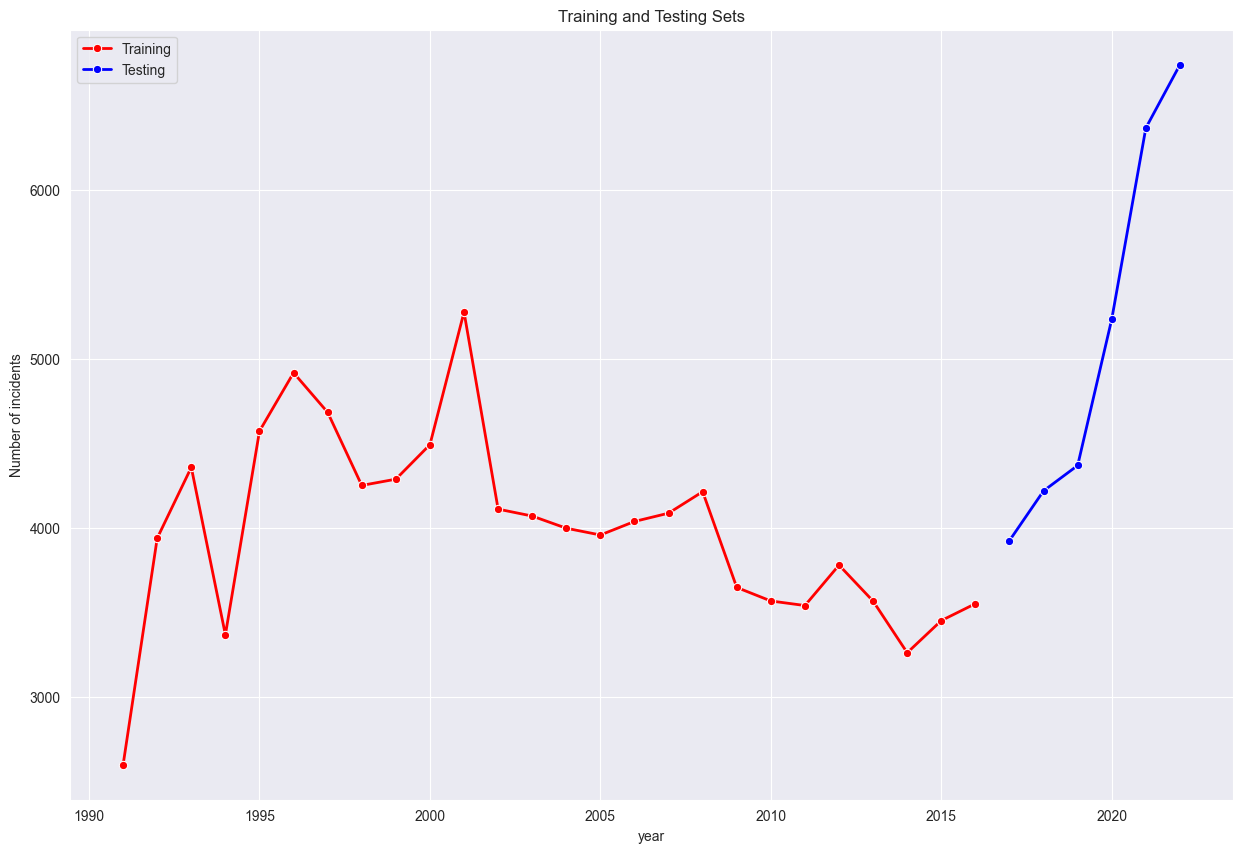

In [125]:
# plot the training and testing sets
plt.figure(figsize=(15, 10))
sns.lineplot(data=train, x='year', y='Number of incidents', linewidth=2, marker='o', color='red', label='Training')
sns.lineplot(data=test, x='year', y='Number of incidents', linewidth=2, marker='o', color='blue', label='Testing')
plt.title('Training and Testing Sets')

In [126]:
# Find the best alpha value
#best_alpha, best_y_hat_avg, best_rms = find_best_alpha(train, test)

best_y_hat_avg, best_rms = get_forecast(train, test)

In [127]:
print('Best RMS:', best_rms)

Best RMS: 384.2627643859007


In [128]:
best_y_hat_avg

,year,Number of incidents,Rolling Average,First Difference,SES
26,2017,3925,3551.6,373.0,3649.783381
27,2018,4219,3682.0,294.0,4105.156676
28,2019,4369,3903.4,150.0,4225.156676
29,2020,5234,4259.8,865.0,4917.156676
30,2021,6364,4822.2,1130.0,5821.156676
31,2022,6738,5384.8,374.0,6120.356676


Text(0.5, 1.0, 'Forecasting the Number of Hate Crimes by Year')

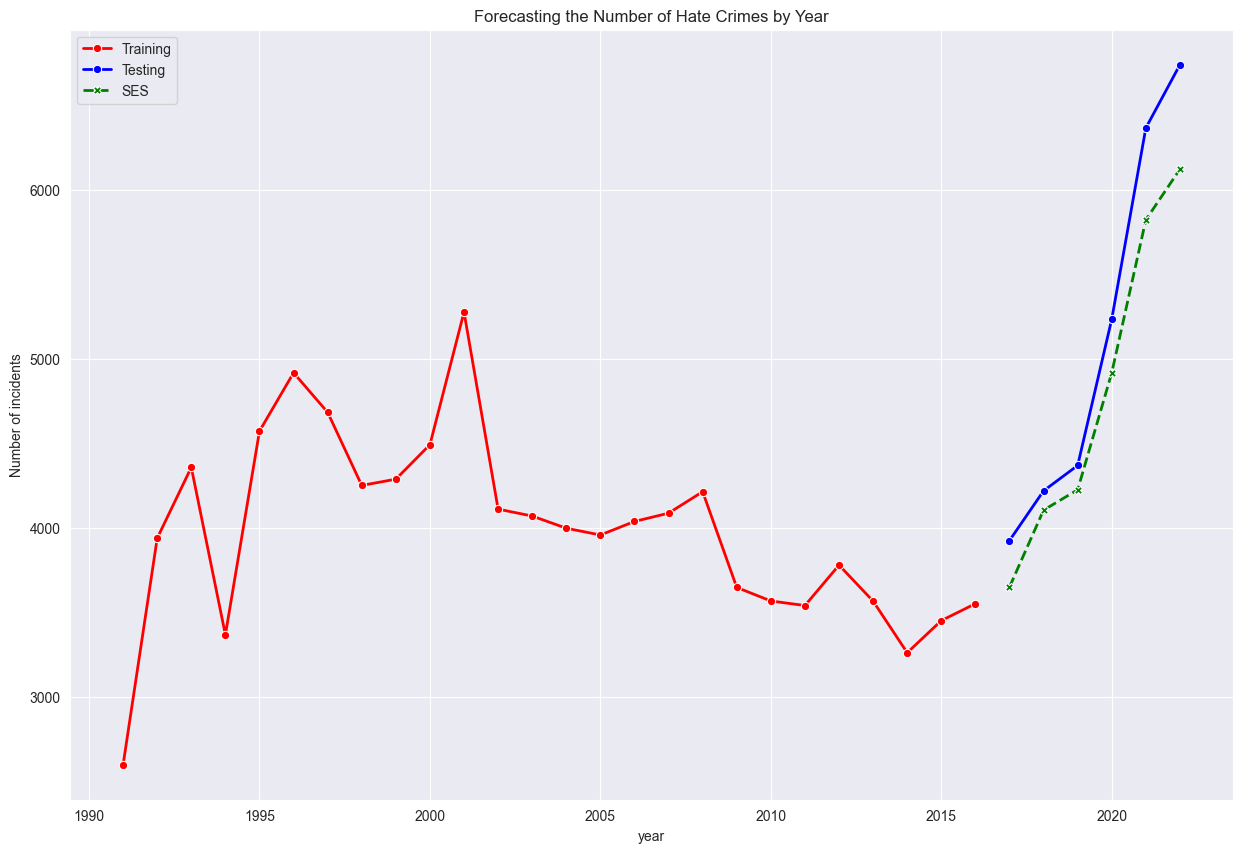

In [129]:
# plot the best alpha value
plt.figure(figsize=(15, 10))
sns.lineplot(data=train, x='year', y='Number of incidents', linewidth=2, marker='o', color='red', label='Training')
sns.lineplot(data=test, x='year', y='Number of incidents', linewidth=2, marker='o', color='blue', label='Testing')
sns.lineplot(data=best_y_hat_avg, x='year', y='SES', linewidth=2, marker='X', color='green', label='SES', linestyle='dashed')
plt.title('Forecasting the Number of Hate Crimes by Year')

In [130]:
def predict_hate_crimes(year):
    pred = []
    ft = pd.DataFrame.ewm(data_year, span=10).mean()['Number of incidents'].iloc[-1]
    pred.append(ft)
    y = year - data_year['year'].iloc[-1]
    # if the year is less than or equal to 2022 then only use the data that is less that year
    if year <= 2022:
        data_y = data_year[data_year['year'] <= year]
    else:
        data_y = data_year 
    j = len(data_y['Number of incidents'])
    
    if year > 2022:
        j = j + y
    
    for i in range(1, j):
        if year <= 2022:
            dt = data_y['Number of incidents'].iloc[i]
        else:
            dt = data_y['Number of incidents'].iloc[-1]
        ft_plus_1 = aalpha * dt + (1 - aalpha) * ft
        pred.append(ft_plus_1)
        ft = ft_plus_1
    return pred[-1] 

In [131]:
# table with the predicted number of hate crimes by year from 2017 to 2025
years = list(range(2017, 2026))
predicted = [predict_hate_crimes(year) for year in years]
predicted = pd.DataFrame({'year': years, 'Number of incidents': predicted})

In [132]:
predicted

,year,Number of incidents
0,2017,3845.421690
1,2018,4144.284338
2,2019,4324.056868
3,2020,5052.011374
4,2021,6101.602275
5,2022,6610.720455
6,2023,6738.000000
7,2024,6738.000000
8,2025,6738.000000


In [136]:
def get_forecast(train, future_years):
    y_hat_avg = train.copy()
    pred = []
    alpha = 2 / (len(train) + 1)  # Adjusted smoothing parameter
    ft = train['Number of incidents'].iloc[-1]
    pred.append(ft)
    for i in range(1, future_years):
        ft_plus_1 = alpha * train['Number of incidents'].iloc[-1] + (1 - alpha) * ft
        pred.append(ft_plus_1)
        ft = ft_plus_1
    future_index = pd.date_range(start=train.index[-1], periods=future_years, freq='Y')[1:]  # Generating future year indices
    y_hat_avg = pd.DataFrame({'SES': pred}, index=future_index)
    return y_hat_avg

In [138]:
get_forecast(data_year, 2023)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 3992-12-31 00:00:00